In [ ]:
from config import *
from cluster import *
from visualizer import *
import pandas as pd
%matplotlib inline
from analyzer import *
import matplotlib.pyplot as plt
import matplotlib
matplotlib.font_manager._rebuild()

plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams['figure.figsize'] = (12, 4)
plt.rcParams["font.weight"] = "normal"
plt.rcParams["font.family"] = "Times New Roman"


In [167]:
days = pd.read_csv(CLUSTERED_DAYS_PATH_OUT)

In [168]:
days['holidays'] = make_holidays(days)

In [12]:
def cl_metrics(df_mtx, clusters):
    labels = clusters.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    metric = dict()
    metric['nclusters'] = n_clusters_
    metric['silhouette'] = metrics.silhouette_score(df_mtx, labels)
    #print(metric)
    #print(metrics.silhouette_samples(df_mtx,labels).shape)
    metric['calinski_harabaz'] = metrics.calinski_harabaz_score(df_mtx, labels)

    #print(metric)
    return metric

In [13]:
def cluster_agglomeration(df, n_clusters):
    df_mtx = df.values
    # metric = metrics.pairwise.pairwise_kernels(days, metric=my_dist)
    clusters = AgglomerativeClustering(n_clusters=n_clusters, affinity=custom_affinity, linkage = 'average')
    clusters = clusters.fit(df_mtx)
    metric = cl_metrics(df_mtx,clusters)
    labels = clusters.labels_
    df["cluster_id"] = labels
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    return df, metric

In [17]:
df = pd.read_csv(DAYS_PATH_IN)
df = df.set_index(df['index'])
df.drop('2018-03-21', axis = 0, inplace=True)
df.drop('2018-03-22', axis = 0, inplace = True)
df.fillna(0, inplace = True)
del df['index']
null_columns = df.columns[df.isnull().any()]
#print(null_columns)
#print(df[df.isnull().any(axis=1)][null_columns].head())
for null_column in null_columns:
    print("Missing value of \t{}\t on \t{}".format(null_column,df[df[null_column].isnull()].index.values[0]))
score = dict()
for i in range(3,20):
    days, score[i] = cluster_agglomeration(df, i)
    print(score[i]['calinski_harabaz'])

17.161209185333213
48.172959990324685
36.43276469508494
29.031704988657417
24.05517654174377
21.865604897168737
19.050572106391428
17.628447960850124
20.35703056627268
19.168562302731864
17.507440937294245
17.846049031628592
16.503790791055255
15.47143502355524
14.645581457068959
14.028024482716754
13.180958795911767


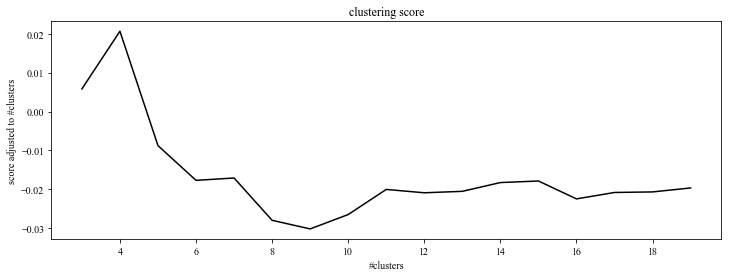

In [103]:
plt.rcParams['figure.figsize'] = [12, 4]
y = [s['silhouette'] for s in score.values()]
for i in range(3,20):
    y[i-3]=y[i-3]/i
plt.plot(list(range(3,20)), y, color = 'black')
plt.xlabel('#clusters')
plt.ylabel('score adjusted to #clusters')
plt.title("clustering score")
plt.show()

In [170]:
df = pd.read_csv(DAYS_PATH_IN)
M = df.values
np.array([[custom_distance_function(o,d) for o in M] for d in M])

TypeError: Can't convert 'float' object to str implicitly

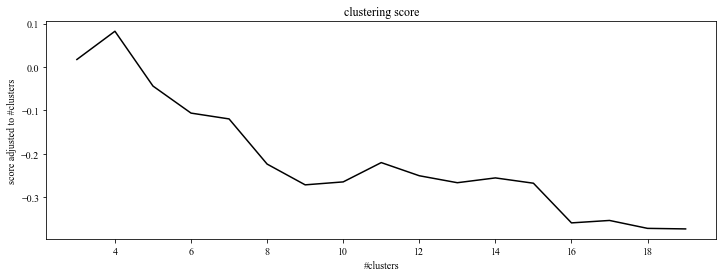

In [104]:
y = [s['silhouette'] for s in score.values()]

plt.plot(list(range(3,20)), y, color = 'black')
plt.xlabel('#clusters')
plt.ylabel('score adjusted to #clusters')
plt.title("clustering score")
plt.show()

In [115]:
days = cluster_agglomeration(df, 15)[0] 

{'silhouette': -0.2675377825436336, 'nclusters': 15}
(179,)
{'silhouette': -0.2675377825436336, 'calinski_harabaz': 16.503790012543252, 'nclusters': 15}
Estimated number of clusters: 15
Silhouette Coefficient: -0.268


In [116]:
days.to_csv(CLUSTERED_DAYS_PATH_OUT)

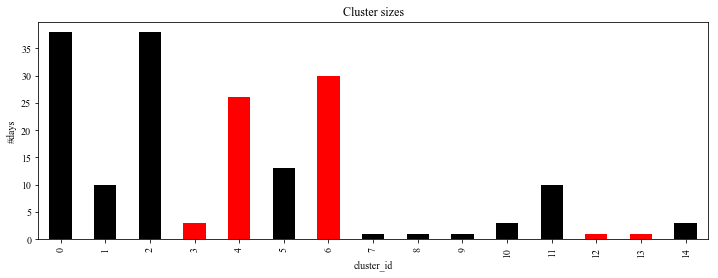

In [117]:
c = ['black']*15
c[3] = 'red'
c[4] = 'red'
c[6] = 'red'
c[12] = 'red'
c[13] = 'red'
plt.rcParams['figure.figsize'] = [12, 4]
plt.xlabel('cluster id')
plt.ylabel("#days")
plt.title("Cluster sizes")

days.groupby('cluster_id').size().plot(kind='bar', color = c)

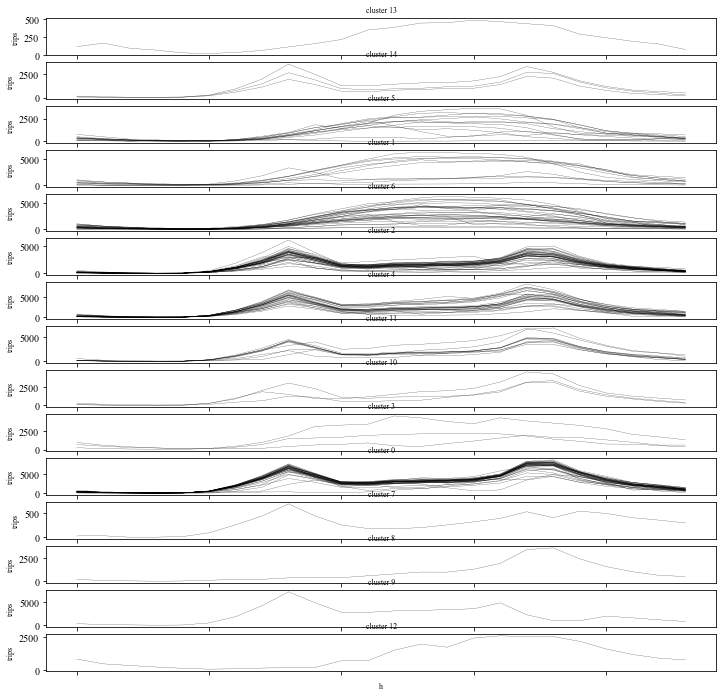

In [118]:
plt.rcParams['figure.figsize'] = [12, 12]
visualize()

In [135]:
config_plotly()

In [143]:
l=list()
for cl in days.cluster_id.unique():
    if days[days.cluster_id == cl].shape[0]>1:
        l.append(cl)
l   

[14, 5, 1, 6, 2, 4, 11, 10, 3, 0]

In [142]:
days['weekday'][days.cluster_id == 8]

index
2018-04-02    0
Name: weekday, dtype: int64

In [144]:
pyplot_data = list()
for cl in l:
            cld = days['weekday'][days.cluster_id == cl]
            pyplot_data.append(go.Box(y=cld,
                                       name=str(cl),
                                       jitter=0.3,
                                       pointpos=-1.8,
                                       boxpoints='all'
                                       )
                                )
            
layout = go.Layout(
    yaxis=dict(
        title='normalized moisture',
        zeroline=False
    ),
    boxmode='group'
)
layout = go.Layout(
    title='Weekdays by cluster',
    xaxis=dict(title='Weekday' ),
    yaxis=dict(title='Cluster',
    )
)
fig = go.Figure(data=pyplot_data, layout=layout)
py.iplot(fig)
#py.iplot(pyplot_data, layout = layout, filename="Clusters holidays", )

In [147]:
pyplot_data = list()
for cl in l:
            cld = days['holidays'][days.cluster_id == cl]
            pyplot_data.append(go.Box(y=cld,
                                       name=str(cl),
                                       jitter=0.3,
                                       pointpos=-1.8,
                                       boxpoints='all'
                                       )
                                )
            
layout = go.Layout(
    yaxis=dict(
        title='normalized moisture',
        zeroline=False
    ),
    boxmode='group'
)
layout = go.Layout(
    title='Daytypes by cluster',
    xaxis=dict(title='Weekday' ),
    yaxis=dict(title='Cluster',
    )
)
fig = go.Figure(data=pyplot_data, layout=layout)
py.iplot(fig)
#py.iplot(pyplot_data, layout = layout, filename="Clusters holidays", )

In [160]:
peak="PM"
_scaler = 6
config_plotly()

color_scale = colorlover.scales['12']['qual']['Paired']

data = list()
top_size = days['7'].max()
for index, row in days.iterrows():
    desc = str(index) + " cluster_id" + str(row['cluster_id'])
    data.append(Scattermapbox(
        lat=[row["Start_Lat_mean" + peak], row["End_Lat_mean" + peak]],
        lon=[row["Start_Lon_mean" + peak], row["End_Lon_mean" + peak]],
        mode='lines',
        text=desc,
        name=desc,
        opacity = 0.7,
        line=Line(width=int(_scaler * row['7']/top_size),
                  color=color_scale[min(11,int(row['cluster_id']))])))

data = Data(data)

layout = Layout(
    showlegend=False,
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=PLOTLY_API_KEY,
        bearing=0,
        center=dict(
            lat=row["Start_Lat_mean" + peak],
            lon=row["Start_Lon_mean" + peak]
        ),
        pitch=0,
        zoom=11
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='Vectors ' + peak)

C:\Users\Rafal\Anaconda2\envs\untitled2\lib\site-packages\plotly\graph_objs\_deprecations.py:372: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.


C:\Users\Rafal\Anaconda2\envs\untitled2\lib\site-packages\plotly\graph_objs\_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [163]:
import plotly.plotly as py
import plotly.graph_objs as go

mapbox_access_token = "wYBVjzEQ7vTR5vNPSvq7"
data = [
    go.Scattermapbox(
        lat=['45.5017'],
        lon=['-73.5673'],
        mode='markers',
        marker=dict(
            size=14
        ),
        text=['Montreal'],
    )
]

layout = go.Layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=45,
            lon=-73
        ),
        pitch=0,
        zoom=5
    ),
)

fig = dict(data=data, layout=layout)

py.iplot(fig, filename='Montreal Mapbox')